<a href="https://colab.research.google.com/github/davrbek-economist/data_science_intro/blob/main/Project_1_(predicting_prices_of_houses_in_Tashkent_city).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [7]:
#location bizga kerak emas. District yetarli.
df = df.drop('location', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   rooms       7565 non-null   int64 
 2   size        7565 non-null   object
 3   level       7565 non-null   int64 
 4   max_levels  7565 non-null   int64 
 5   price       7565 non-null   object
dtypes: int64(3), object(3)
memory usage: 354.7+ KB


In [8]:
# Info ga ko'ra size hamda price ustunlari object ko'rinishida edi. Uni floatga o'tkazamiz
#size
df.drop(5347, inplace=True)

In [9]:
df['size']=df['size'].astype('float64')


In [10]:
#price
df['price'].replace('Договорная', np.nan, inplace=True)

In [11]:
df['price']=df['price'].astype('float64')

In [12]:
df.dropna(inplace=True)

In [13]:
# Extraordinary qiymatlarni tashlab yuboramiz
df = df.drop(df[df['size']>300].index)

In [14]:
df=df.drop(df[df['price']>175000].index)

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rooms,size,level,max_levels,price
rooms,1.000000,0.816594,0.146392,0.175650,0.605548
size,0.816594,1.000000,0.198991,0.309269,0.770882
level,0.146392,0.198991,1.000000,0.595116,0.076832
max_levels,0.175650,0.309269,0.595116,1.000000,0.256660
price,0.605548,0.770882,0.076832,0.256660,1.000000


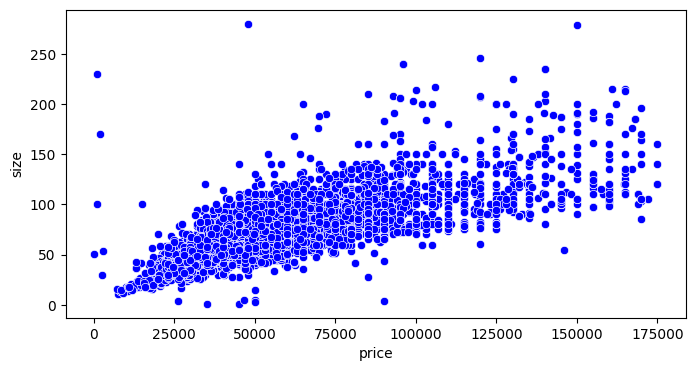

In [16]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='price', y='size', color='b',)
plt.show()

Ma'lumotlarni to'g'irlab oldik. Endi ML ning ga tayyorlashni boshlaymiz


In [17]:
#Train and test set split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=54)
X_train = train_set.drop('price', axis=1)
y = train_set['price'].copy()

X_num = X_train.drop('district', axis=1)

**Pipeline** yordamida automatlashtiramiz va bo'limlashtiramiz


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [19]:
#Sonli ustunlar uchun konveyr yaratamiz
num_pipeline = Pipeline([('std_scale',StandardScaler())]) #Qiymatlar oralig'ini standardlashtirish
num_pipeline.fit_transform(X_num)

array([[-0.56133756, -0.55781943, -0.75117973, -1.160796  ],
       [-0.56133756, -0.69825752, -0.30062725, -0.38501484],
       [ 0.40792646,  0.28480911, -0.30062725, -0.38501484],
       ...,
       [ 0.40792646,  0.28480911, -1.2017322 , -0.38501484],
       [ 0.40792646, -0.2067242 , -0.30062725, -0.38501484],
       [-1.53060158, -1.40044798,  0.14992522, -0.77290542]])

In [20]:
# Categorical ustunga pipeline
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']
full_pipeline = ColumnTransformer([('num',num_pipeline, num_attribs),
                                   ('cat',OneHotEncoder(), cat_attribs)
])

In [21]:
# Ana endi to'lik konveyrni ishga tushuramiz
X_prepared = full_pipeline.fit_transform(X_train)

In [22]:
X_prepared[0:5,:] # Ko'rib turganingizdek, ma'lumotlarni machine leraning tushunadigan numeric ko'rinishga o'tkazdik

array([[-0.56133756, -0.55781943, -0.75117973, -1.160796  ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.69825752, -0.30062725, -0.38501484,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646,  0.28480911, -0.30062725, -0.38501484,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.53060158, -1.1195718 , -0.30062725, -0.77290542,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646, -0.10139564, -0

## **Machine** **Learning**

**Linear Regression Model**

In [23]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()

In [24]:
LR_Model.fit(X_prepared,y)

LinearRegression()

In [25]:
# Tasodifiy 5 ta qator olib solishtirib ko'ramiz
test_data = X_train.sample(5)
test_data

,district,rooms,size,level,max_levels
3025,Мирзо-Улугбекский,4,132.0,4,5
2275,Мирзо-Улугбекский,2,50.0,3,4
1752,Мирзо-Улугбекский,1,46.0,2,9
6155,Мирзо-Улугбекский,3,56.0,5,5
6240,Чиланзарский,2,52.0,3,4


In [26]:
test_label = y.loc[test_data.index]
test_label

3025    87000.0
2275    42000.0
1752    42000.0
6155    50000.0
6240    38900.0
Name: price, dtype: float64

In [28]:
# Test data ni pipeline dan o'tkazamiz
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.37719048,  2.18072334,  0.14992522, -0.38501484,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.69825752, -0.30062725, -0.77290542,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.53060158, -0.83869561, -0.75117973,  1.16654748,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40792646, -0.48760039,  0.60047769, -0.38501484,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.56133756, -0.62803848, -0

In [29]:
predicted_data = LR_Model.predict(test_data_prepared)
predicted_data

array([97387.25748794, 38982.61177004, 41987.73823364, 40696.71646665,
       37632.31891941])

In [31]:
# Solishtiramiz
pd.DataFrame({'Predict': predicted_data, 'Real':test_label})

,Predict,Real
3025,97387.257488,87000.0
2275,38982.611770,42000.0
1752,41987.738234,42000.0
6155,40696.716467,50000.0
6240,37632.318919,38900.0


**Modelni baholash**

In [32]:
# Test_set ni ishlatish vaqti keldi;)
# Avval test_setni label qatnashmaganini ajratamiz
X_test = test_set.drop("price", axis=1)


In [39]:
# Endi esa label ni ajratamiz
y_test = test_set['price'].copy()

In [35]:
X_test_prepared = full_pipeline.transform(X_test)

In [38]:
y_predicted = LR_Model.predict(X_test_prepared)

In [40]:
# Bashorat va real datani solishtirish uchun avvalgi bo'limda ko'rgan Root mean square error (RMSE) dan foydalanamiz:.
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test,y_predicted)
# RMSE ni topamiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


16356.655374395164


#**DecisionTree**

In [43]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared,y)


DecisionTreeRegressor()

**Baholash**

In [44]:
y_predicted = Tree_model.predict(X_test_prepared)

In [45]:
lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17257.592688124467

#**Random Forest**

In [50]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared,y)

RandomForestRegressor()

**Baholash**

In [53]:
y_predicted = RF_model.predict(X_test_prepared)

In [55]:
lin_mse = mean_squared_error(y_test,y_predicted)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

13882.924246195833

In [57]:
lin_rmse/df['price'].mean()*100

25.955154413344854